In [1]:
import requests
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from IPython.display import Image
import json
from io import StringIO

In [2]:
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.geojson'

In [3]:
params = {"$where": "incident_reported between '2021-01-01T00:00:00' and '2021-06-30T23:59:59'", 
          'offense_description': "BURGLARY- AGGRAVATED",
          '$limit': 1000000}

In [4]:
burglary= requests.get(endpoint, params)

In [5]:
burglary

<Response [200]>

In [6]:
burglary= gpd.read_file(StringIO(burglary.text))

In [7]:
burglary= burglary.drop_duplicates(subset='incident_number', keep='first', inplace=False, ignore_index=False)

In [8]:
len(burglary)

828

In [9]:
burglary.columns

Index(['victim_county_resident', 'zip_code', 'victim_number', 'offense_nibrs',
       'rpa', 'latitude', 'victim_race', 'incident_number',
       'investigation_status', 'offense_number', 'offense_description',
       'longitude', 'domestic_related', 'victim_ethnicity',
       'incident_location', 'victim_description', 'location_code',
       'report_type', 'incident_reported', 'weapon_description',
       'location_description', 'weapon_primary', 'report_type_description',
       'victim_type', 'incident_status_code', 'incident_status_description',
       'zone', 'victim_gender', 'incident_occurred', 'primary_key',
       'geometry'],
      dtype='object')

In [10]:
burglary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 828 entries, 0 to 1050
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   victim_county_resident       803 non-null    object  
 1   zip_code                     142 non-null    object  
 2   victim_number                828 non-null    object  
 3   offense_nibrs                828 non-null    object  
 4   rpa                          771 non-null    object  
 5   latitude                     826 non-null    object  
 6   victim_race                  803 non-null    object  
 7   incident_number              828 non-null    object  
 8   investigation_status         828 non-null    object  
 9   offense_number               828 non-null    object  
 10  offense_description          828 non-null    object  
 11  longitude                    826 non-null    object  
 12  domestic_related             828 non-null    bool    
 

In [11]:
burglary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
tn_shape= gpd.read_file('../data/tl_2019_47_tract.shp')

In [13]:
print(tn_shape.crs)
tn_shape.head()

epsg:4269


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,165,021002,47165021002,210.02,Census Tract 210.02,G5020,S,30654374,207994,+36.3521602,-086.6464309,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,47,165,020901,47165020901,209.01,Census Tract 209.01,G5020,S,23811766,3412697,+36.3483143,-086.4070907,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."
2,47,165,020300,47165020300,203,Census Tract 203,G5020,S,14629292,0,+36.5796910,-086.5114955,"POLYGON ((-86.53716 36.56852, -86.53713 36.568..."
3,47,165,020902,47165020902,209.02,Census Tract 209.02,G5020,S,9756715,0,+36.3724350,-086.4411274,"POLYGON ((-86.47106 36.38238, -86.47081 36.382..."
4,47,165,020800,47165020800,208,Census Tract 208,G5020,S,10235406,37743,+36.4005117,-086.4528100,"POLYGON ((-86.48786 36.37320, -86.48783 36.373..."


In [14]:
tn_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1497 non-null   object  
 1   COUNTYFP  1497 non-null   object  
 2   TRACTCE   1497 non-null   object  
 3   GEOID     1497 non-null   object  
 4   NAME      1497 non-null   object  
 5   NAMELSAD  1497 non-null   object  
 6   MTFCC     1497 non-null   object  
 7   FUNCSTAT  1497 non-null   object  
 8   ALAND     1497 non-null   int64   
 9   AWATER    1497 non-null   int64   
 10  INTPTLAT  1497 non-null   object  
 11  INTPTLON  1497 non-null   object  
 12  geometry  1497 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 152.2+ KB


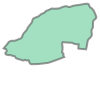

In [15]:
tn_shape.loc[0,'geometry']

In [16]:
print(tn_shape.loc[0,'geometry'])

POLYGON ((-86.699271 36.327749, -86.699229 36.327796, -86.699089 36.32796, -86.698944 36.32813, -86.698938 36.328138, -86.69889099999999 36.328193, -86.69842199999999 36.32882499999999, -86.69830499999999 36.328961, -86.69795599999999 36.329372, -86.69784 36.329509, -86.697823 36.329528, -86.697801 36.329556, -86.697774 36.329586, -86.69775799999999 36.329606, -86.69762399999999 36.329761, -86.697225 36.330227, -86.697092 36.330383, -86.697003 36.330487, -86.696736 36.330798, -86.696648 36.330903, -86.69640299999999 36.331192, -86.69626599999999 36.331352, -86.69613199999999 36.331511, -86.695768 36.332002, -86.69552299999999 36.332355, -86.695223 36.332781, -86.694885 36.333265, -86.694774 36.333404, -86.694738 36.33345, -86.694497 36.333708, -86.694406 36.333789, -86.69427499999999 36.333908, -86.69407699999999 36.334069, -86.693748 36.334295, -86.69352599999999 36.334424, -86.69318199999999 36.334597, -86.69280000000001 36.334754, -86.692301 36.334905, -86.692037 36.334967, -86.6916

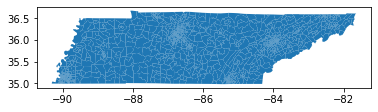

In [17]:
tn_shape.plot();

In [18]:
tn_shape.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [19]:
tn_shape = tn_shape.rename({'NAMELSAD': 'TRACT_NAME','TRACTCE':'tract'}, axis = 'columns')

In [20]:
tn_shape.columns

Index(['STATEFP', 'COUNTYFP', 'tract', 'GEOID', 'NAME', 'TRACT_NAME', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [21]:
burglary.crs = tn_shape.crs

In [22]:
tn_burglary= gpd.sjoin(tn_shape, burglary, how = 'inner', op ='contains')

In [23]:
tn_burglary.head()

,STATEFP,COUNTYFP,tract,GEOID,NAME,TRACT_NAME,MTFCC,FUNCSTAT,ALAND,AWATER,...,location_description,weapon_primary,report_type_description,victim_type,incident_status_code,incident_status_description,zone,victim_gender,incident_occurred,primary_key
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,"RESIDENCE, HOME",17,DISPATCHED,I,O,OPEN,721,F,2021-05-14T19:00:00,20210270239_11
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,OUTBUILDING,16,DISPATCHED,I,O,OPEN,725,M,2021-01-01T06:00:00,20210001419_13
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,"RESIDENCE, HOME",17,DISPATCHED,I,O,OPEN,635,M,2021-01-13T12:00:00,20210042105_11
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,"RESIDENCE, HOME",17,DISPATCHED,I,R,REFUSED TO COOPERATE,635,F,2021-01-12T11:37:00,20210021782_11
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,"RESIDENCE, HOME",17,DISPATCHED,B,O,OPEN,None,None,2021-03-20T19:33:00,20210162248_11


In [24]:
tn_burglary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 826 entries, 27 to 1416
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   STATEFP                      826 non-null    object  
 1   COUNTYFP                     826 non-null    object  
 2   tract                        826 non-null    object  
 3   GEOID                        826 non-null    object  
 4   NAME                         826 non-null    object  
 5   TRACT_NAME                   826 non-null    object  
 6   MTFCC                        826 non-null    object  
 7   FUNCSTAT                     826 non-null    object  
 8   ALAND                        826 non-null    int64   
 9   AWATER                       826 non-null    int64   
 10  INTPTLAT                     826 non-null    object  
 11  INTPTLON                     826 non-null    object  
 12  geometry                     826 non-null    geometry


In [25]:
tn_burglary['TRACT_NAME'].value_counts()

Census Tract 163       53
Census Tract 162       21
Census Tract 110.01    20
Census Tract 193       19
Census Tract 195       19
                       ..
Census Tract 178        1
Census Tract 188.01     1
Census Tract 119        1
Census Tract 186.01     1
Census Tract 182.02     1
Name: TRACT_NAME, Length: 148, dtype: int64

In [26]:
tn_burglary['freq'] = \
    tn_burglary.groupby('TRACT_NAME', as_index=False)['TRACT_NAME'].transform(lambda s: s.count())

In [27]:
print(tn_burglary['freq'])

27      7
27      7
27      7
27      7
27      7
       ..
1416    5
1416    5
1416    5
1416    5
1416    5
Name: freq, Length: 826, dtype: int64


In [28]:
tn_burglary.head()

,STATEFP,COUNTYFP,tract,GEOID,NAME,TRACT_NAME,MTFCC,FUNCSTAT,ALAND,AWATER,...,weapon_primary,report_type_description,victim_type,incident_status_code,incident_status_description,zone,victim_gender,incident_occurred,primary_key,freq
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,17,DISPATCHED,I,O,OPEN,721,F,2021-05-14T19:00:00,20210270239_11,7
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,16,DISPATCHED,I,O,OPEN,725,M,2021-01-01T06:00:00,20210001419_13,7
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,17,DISPATCHED,I,O,OPEN,635,M,2021-01-13T12:00:00,20210042105_11,7
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,17,DISPATCHED,I,R,REFUSED TO COOPERATE,635,F,2021-01-12T11:37:00,20210021782_11,7
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,17,DISPATCHED,B,O,OPEN,None,None,2021-03-20T19:33:00,20210162248_11,7


In [29]:
with open('../data/Census.json') as fi:
    credentials = json.load(fi)
    
    api_key = credentials['api_key']

In [30]:
endpoint = 'https://api.census.gov/data/2019/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=state:47&in=county:037'

In [31]:
population = requests.get(endpoint)

In [32]:
population= pd.read_csv(StringIO(population.text))

In [33]:
population.head

<bound method NDFrame.head of                                            [["NAME"  B01001_001E  state  \
["Census Tract 156.31  Davidson County   Tennessee"        12176     47   
["Census Tract 158.04  Davidson County   Tennessee"         4098     47   
["Census Tract 177.01  Davidson County   Tennessee"         2466     47   
["Census Tract 177.02  Davidson County   Tennessee"         5210     47   
["Census Tract 183.01  Davidson County   Tennessee"         8254     47   
...                                             ...          ...    ...   
["Census Tract 156.13  Davidson County   Tennessee"         5252     47   
["Census Tract 156.20  Davidson County   Tennessee"         7262     47   
["Census Tract 161     Davidson County   Tennessee"         2345     47   
["Census Tract 114     Davidson County   Tennessee"         4617     47   
["Census Tract 138     Davidson County   Tennessee"         2099     47   

                                        county    tract]  Unnamed: 5 

In [34]:
population.columns

Index(['[["NAME"', 'B01001_001E', 'state', 'county', 'tract]', 'Unnamed: 5'], dtype='object')

In [35]:
population = population.rename({'B01001_001E': 'population',}, axis = 'columns')

In [36]:
endpoint1 = endpoint = 'https://api.census.gov/data/2019/acs/acs5/subject?get=NAME,S1901_C01_012E&for=tract:*&in=state:47&in=county:037'

In [37]:
median_income = requests.get(endpoint1)

In [38]:
median_income = pd.read_csv(StringIO(median_income.text))

In [39]:
median_income.head

<bound method NDFrame.head of                                            [["NAME"  S1901_C01_012E  state  \
["Census Tract 156.31  Davidson County   Tennessee"           75579     47   
["Census Tract 158.04  Davidson County   Tennessee"           45129     47   
["Census Tract 177.01  Davidson County   Tennessee"          134786     47   
["Census Tract 177.02  Davidson County   Tennessee"          107813     47   
["Census Tract 183.01  Davidson County   Tennessee"           87591     47   
...                                             ...             ...    ...   
["Census Tract 156.13  Davidson County   Tennessee"           37656     47   
["Census Tract 156.20  Davidson County   Tennessee"           54149     47   
["Census Tract 161     Davidson County   Tennessee"           48221     47   
["Census Tract 114     Davidson County   Tennessee"           50857     47   
["Census Tract 138     Davidson County   Tennessee"           37679     47   

                                 

In [40]:
median_income.columns

Index(['[["NAME"', 'S1901_C01_012E', 'state', 'county', 'tract]',
       'Unnamed: 5'],
      dtype='object')

In [41]:
median_income = median_income.rename({'S1901_C01_012E': 'median_income',}, axis = 'columns')

In [42]:
median_income.columns

Index(['[["NAME"', 'median_income', 'state', 'county', 'tract]', 'Unnamed: 5'], dtype='object')

In [43]:
population.columns

Index(['[["NAME"', 'population', 'state', 'county', 'tract]', 'Unnamed: 5'], dtype='object')

In [44]:
mi_pop = pd.merge(left = population,
        right = median_income)

In [45]:
mi_pop.columns

Index(['[["NAME"', 'population', 'state', 'county', 'tract]', 'Unnamed: 5',
       'median_income'],
      dtype='object')

In [46]:
mi_pop.rename(columns={ mi_pop.columns[4]: "tract" }, inplace = True)


In [47]:
mi_pop.rename(columns={ mi_pop.columns[0]: "name" }, inplace = True)

In [48]:
mi_pop.head()

,name,population,state,county,tract,Unnamed: 5,median_income
0,"Tennessee""",12176,47,37,015631],NaN,75579
1,"Tennessee""",4098,47,37,015804],NaN,45129
2,"Tennessee""",2466,47,37,017701],NaN,134786
3,"Tennessee""",5210,47,37,017702],NaN,107813
4,"Tennessee""",8254,47,37,018301],NaN,87591


In [49]:
mi_pop['tract']= mi_pop['tract'].str.replace("]", "")

C:\Users\yvonn\AppData\Local\Temp/ipykernel_30064/2223354361.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mi_pop['tract']= mi_pop['tract'].str.replace("]", "")


In [50]:
tn_burglary.columns

Index(['STATEFP', 'COUNTYFP', 'tract', 'GEOID', 'NAME', 'TRACT_NAME', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'index_right', 'victim_county_resident', 'zip_code', 'victim_number',
       'offense_nibrs', 'rpa', 'latitude', 'victim_race', 'incident_number',
       'investigation_status', 'offense_number', 'offense_description',
       'longitude', 'domestic_related', 'victim_ethnicity',
       'incident_location', 'victim_description', 'location_code',
       'report_type', 'incident_reported', 'weapon_description',
       'location_description', 'weapon_primary', 'report_type_description',
       'victim_type', 'incident_status_code', 'incident_status_description',
       'zone', 'victim_gender', 'incident_occurred', 'primary_key', 'freq'],
      dtype='object')

In [51]:
tn = pd.merge(left = tn_burglary, right = mi_pop,
          on = 'tract')

In [52]:
tn.head()

,STATEFP,COUNTYFP,tract,GEOID,NAME,TRACT_NAME,MTFCC,FUNCSTAT,ALAND,AWATER,...,victim_gender,incident_occurred,primary_key,freq,name,population,state,county,Unnamed: 5,median_income
0,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,F,2021-05-14T19:00:00,20210270239_11,7,"Tennessee""",3397,47,37,NaN,63864
1,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,M,2021-01-01T06:00:00,20210001419_13,7,"Tennessee""",3397,47,37,NaN,63864
2,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,M,2021-01-13T12:00:00,20210042105_11,7,"Tennessee""",3397,47,37,NaN,63864
3,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,F,2021-01-12T11:37:00,20210021782_11,7,"Tennessee""",3397,47,37,NaN,63864
4,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,...,None,2021-03-20T19:33:00,20210162248_11,7,"Tennessee""",3397,47,37,NaN,63864


In [53]:
tn.columns

Index(['STATEFP', 'COUNTYFP', 'tract', 'GEOID', 'NAME', 'TRACT_NAME', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'index_right', 'victim_county_resident', 'zip_code', 'victim_number',
       'offense_nibrs', 'rpa', 'latitude', 'victim_race', 'incident_number',
       'investigation_status', 'offense_number', 'offense_description',
       'longitude', 'domestic_related', 'victim_ethnicity',
       'incident_location', 'victim_description', 'location_code',
       'report_type', 'incident_reported', 'weapon_description',
       'location_description', 'weapon_primary', 'report_type_description',
       'victim_type', 'incident_status_code', 'incident_status_description',
       'zone', 'victim_gender', 'incident_occurred', 'primary_key', 'freq',
       'name', 'population', 'state', 'county', 'Unnamed: 5', 'median_income'],
      dtype='object')

In [54]:
tn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 826 entries, 0 to 825
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   STATEFP                      826 non-null    object  
 1   COUNTYFP                     826 non-null    object  
 2   tract                        826 non-null    object  
 3   GEOID                        826 non-null    object  
 4   NAME                         826 non-null    object  
 5   TRACT_NAME                   826 non-null    object  
 6   MTFCC                        826 non-null    object  
 7   FUNCSTAT                     826 non-null    object  
 8   ALAND                        826 non-null    int64   
 9   AWATER                       826 non-null    int64   
 10  INTPTLAT                     826 non-null    object  
 11  INTPTLON                     826 non-null    object  
 12  geometry                     826 non-null    geometry
 1

In [55]:
tn['pop_per1k'] = tn['population']/tn['freq']

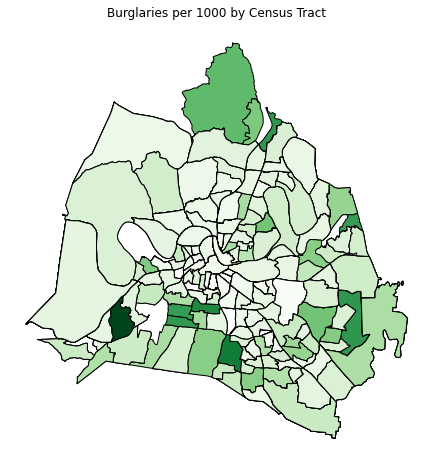

In [56]:
fig, ax = plt.subplots(figsize=(8,8))
tn.plot(column = 'pop_per1k',
       cmap = 'Greens',
        edgecolor = 'black',
                   ax = ax)
plt.title('Burglaries per 1000 by Census Tract', fontsize = 12)
ax.axis('off');